In [2]:
import numpy as np
import matplotlib.pyplot as plt

Dataset path

In [3]:
data_set_path='/content/drive/MyDrive/Datasets/Asian vs African Elephants'

In [4]:
train_data_path='/content/drive/MyDrive/Datasets/Asian vs African Elephants/train'
test_data_path='/content/drive/MyDrive/Datasets/Asian vs African Elephants/test'

Making Images into linear  format using tensorflow  ImageDataGenerator

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image  import ImageDataGenerator 

In [6]:
preprocess_train=ImageDataGenerator(rescale=1. /255,
                                 shear_range=0.2,
                                 zoom_range=0.4,
                                 vertical_flip=True,
                                 horizontal_flip=True)

preprocess_test=ImageDataGenerator(rescale=1./255)

Collecting each image from train and test folder

In [9]:
labels=['African','Asian']

In [10]:
train_data=preprocess_train.flow_from_directory(train_data_path,
                                                target_size=[256,256],
                                                class_mode='binary',
                                                classes=labels,
                                                batch_size=32)
test_data=preprocess_test.flow_from_directory(test_data_path,
                                              target_size=[256,256],
                                              class_mode='binary',
                                              classes=labels,
                                              batch_size=32)

Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


Now i am taking copy of VGG16 Architecture

In [12]:
from tensorflow.keras.applications.vgg19 import VGG19

Making Image Size

In [13]:
Image_size=[256,256]

In [15]:
sol=VGG19(input_shape=Image_size + [3] , weights='imagenet' , include_top = False)

80134624/80134624 [==============================] - 1s 0us/step


In [16]:
#to make not to update weights of VGG16

for i in sol.layers:
  i.trainable = False

In [17]:
# developing my own output layer

from tensorflow.keras.layers import Flatten

In [18]:
y=Flatten()(sol.output)

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [20]:
from keras.api._v2.keras import activations
final = Dense(1, activation = 'sigmoid')(y)

In [21]:
from tensorflow.keras.models import Model

In [22]:
vgg19_model = Model(sol.inputs, final)

In [23]:
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [24]:
vgg19_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])

In [25]:
vgg19_model.fit(train_data , epochs = 2)

Epoch 1/2
27/27 [==============================] - 770s 28s/step - loss: 1.0918 - Accuracy: 0.5298
Epoch 2/2
27/27 [==============================] - 752s 28s/step - loss: 0.7052 - Accuracy: 0.5893


Checking with test_data

In [26]:
test_data.classes 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
y_test_pred=vgg19_model.predict(test_data)

6/6 [==============================] - 169s 28s/step


In [29]:
y_test_pred

array([[0.18323204],
       [0.37588677],
       [0.4873291 ],
       [0.89486194],
       [0.07142363],
       [0.12285612],
       [0.37872958],
       [0.3360503 ],
       [0.16260763],
       [0.3360503 ],
       [0.3114083 ],
       [0.7095224 ],
       [0.3359224 ],
       [0.16771019],
       [0.4626091 ],
       [0.3572692 ],
       [0.3112431 ],
       [0.4799527 ],
       [0.38884774],
       [0.33809766],
       [0.6553477 ],
       [0.2997681 ],
       [0.19763835],
       [0.44652137],
       [0.14281695],
       [0.22256386],
       [0.24971125],
       [0.44447678],
       [0.12863272],
       [0.18139218],
       [0.18812288],
       [0.12525402],
       [0.14828385],
       [0.3114608 ],
       [0.60246325],
       [0.45411953],
       [0.41231707],
       [0.50336057],
       [0.6477369 ],
       [0.3694205 ],
       [0.26123148],
       [0.33773923],
       [0.25241283],
       [0.19447751],
       [0.42669478],
       [0.62276196],
       [0.23545478],
       [0.298

In [30]:
c=[]

for i in y_test_pred:
  if i>0.5:
    c.append(1)
  else:
    c.append(0)


In [31]:
c

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0]

In [32]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [33]:
accuracy_score(test_data.classes , c)

0.5372340425531915

In [34]:
confusion_matrix(test_data.classes, c)

array([[76, 21],
       [66, 25]])

In [35]:
print(classification_report(test_data.classes ,c))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64        97
           1       0.54      0.27      0.36        91

    accuracy                           0.54       188
   macro avg       0.54      0.53      0.50       188
weighted avg       0.54      0.54      0.50       188



Checking with own data

In [36]:
import cv2

In [38]:
def predictions(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg19_model.predict(image)
  print(result)
  if result > 0.5:
    print('African')
  else:
    print('Asian')
  img = plt.imread(path)
  plt.imshow(img)

(1, 256, 256, 3)
1/1 [==============================] - 2s 2s/step
[[0.19180916]]
Asian


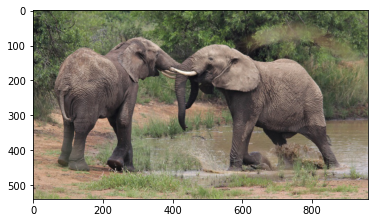

In [39]:
predictions('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/African/af_te13.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 2s 2s/step
[[0.24221091]]
Asian


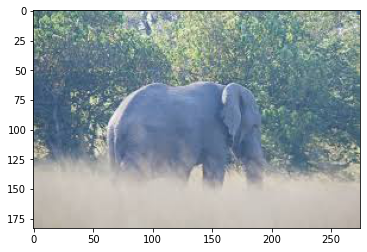

In [40]:
predictions('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/African/af_te23.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 2s 2s/step
[[0.42530847]]
Asian


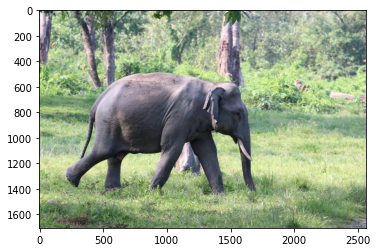

In [41]:
predictions('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/Asian/as_te20.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[0.38692197]]
Asian


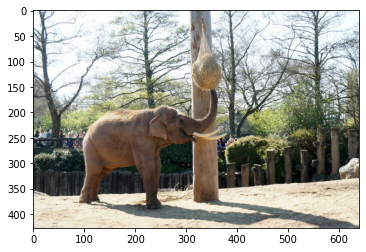

In [42]:
predictions('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/Asian/as_te32.jpg')